In [239]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, RobustScaler,StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer, KNNImputer

In [240]:
import sys
sys.path.insert(0, '/Users/bertagrim/dev_projects/data_science_bootcamp/_CLASS CONTENT/_functions_')

In [241]:
from fx_MLClassification import *
from Functions_EDA import *

In [242]:
# survival - Survival (0 = No; 1 = Yes)
# class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
# name - Name
# sex - Sex
# age - Age
# sibsp - Number of Siblings/Spouses Aboard
# parch - Number of Parents/Children Aboard
# ticket - Ticket Number
# fare - Passenger Fare
# cabin - Cabin
# embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [243]:
list_missing_values=['Nan']

In [244]:
train_data = pd.read_csv("/Users/bertagrim/dev_projects/titanic/train.csv", na_values=list_missing_values)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [245]:
test_data = pd.read_csv("/Users/bertagrim/dev_projects/titanic/test.csv", na_values=list_missing_values)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [246]:
#gender_submission=pd.read_csv("/Users/bertagrim/dev_projects/titanic/gender_submission.csv")
#gender_submission.head()

In [247]:
print(train_data.shape)
print(test_data.shape)


(891, 12)
(418, 11)


In [248]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [249]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [250]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## Data cleaning

In [251]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [252]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [253]:
train_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [254]:
train_data['Cabin'].fillna('no_cabin',inplace=True)
test_data['Cabin'].fillna('no_cabin',inplace=True)

In [255]:
print(train_data.Cabin.isnull().sum())
print(test_data.Cabin.isnull().sum())

0
0


In [256]:
train_data.Embarked.isnull().sum()

2

In [257]:
train_data['Embarked'].fillna('unknown',inplace=True)
train_data.Embarked.isnull().sum()

0

In [258]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [259]:
test_data['Fare']= test_data['Fare'].fillna(test_data['Fare'].median())

In [260]:
test_data['Fare'].isnull().sum()

0

In [261]:
test_data['Fare'].median()

14.4542

## Null values Age

#### Method 1: group by means

In [262]:
all_data=pd.concat([train_data, test_data], ignore_index=True)

In [263]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [264]:
all_data.groupby(['Sex','Pclass']).Age.mean()


Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [265]:
mean_f1=37
mean_f2=27
mean_f3=22
mean_m1=41
mean_m2=31
mean_m3=26

In [266]:
train_data_c=train_data.copy()
        

In [267]:
train_data_c.loc[(train_data_c['Sex']=='female') & (train_data_c['Pclass']==1), 'Age'] = train_data_c.loc[(train_data_c['Sex']=='female') & (train_data_c['Pclass']==1),'Age'].fillna(mean_f1)
train_data_c.loc[(train_data_c['Sex']=='female') & (train_data_c['Pclass']==2), 'Age'] = train_data_c.loc[(train_data_c['Sex']=='female') & (train_data_c['Pclass']==2),'Age'].fillna(mean_f2)
train_data_c.loc[(train_data_c['Sex']=='female') & (train_data_c['Pclass']==3), 'Age'] = train_data_c.loc[(train_data_c['Sex']=='female') & (train_data_c['Pclass']==3),'Age'].fillna(mean_f3)
train_data_c.loc[(train_data_c['Sex']=='male') & (train_data_c['Pclass']==1), 'Age'] = train_data_c.loc[(train_data_c['Sex']=='male') & (train_data_c['Pclass']==1),'Age'].fillna(mean_m1)
train_data_c.loc[(train_data_c['Sex']=='male') & (train_data_c['Pclass']==2), 'Age'] = train_data_c.loc[(train_data_c['Sex']=='male') & (train_data_c['Pclass']==2),'Age'].fillna(mean_m2)
train_data_c.loc[(train_data_c['Sex']=='male') & (train_data_c['Pclass']==3), 'Age'] = train_data_c.loc[(train_data_c['Sex']=='male') & (train_data_c['Pclass']==3),'Age'].fillna(mean_m3)


In [268]:
train_data_c['Age'].isnull().sum()

0

In [269]:
test_data_c=test_data.copy()

In [270]:
test_data_c.loc[(test_data_c['Sex']=='female') & (test_data_c['Pclass']==1), 'Age'] = test_data_c.loc[(test_data_c['Sex']=='female') & (test_data_c['Pclass']==1),'Age'].fillna(mean_f1)
test_data_c.loc[(test_data_c['Sex']=='female') & (test_data_c['Pclass']==2), 'Age'] = test_data_c.loc[(test_data_c['Sex']=='female') & (test_data_c['Pclass']==2),'Age'].fillna(mean_f2)
test_data_c.loc[(test_data_c['Sex']=='female') & (test_data_c['Pclass']==3), 'Age'] = test_data_c.loc[(test_data_c['Sex']=='female') & (test_data_c['Pclass']==3),'Age'].fillna(mean_f3)
test_data_c.loc[(test_data_c['Sex']=='male') & (test_data_c['Pclass']==1), 'Age'] = test_data_c.loc[(test_data_c['Sex']=='male') & (test_data_c['Pclass']==1),'Age'].fillna(mean_m1)
test_data_c.loc[(test_data_c['Sex']=='male') & (test_data_c['Pclass']==2), 'Age'] = test_data_c.loc[(test_data_c['Sex']=='male') & (test_data_c['Pclass']==2),'Age'].fillna(mean_m2)
test_data_c.loc[(test_data_c['Sex']=='male') & (test_data_c['Pclass']==3), 'Age'] = test_data_c.loc[(test_data_c['Sex']=='male') & (test_data_c['Pclass']==3),'Age'].fillna(mean_m3)


In [271]:
test_data_c['Age'].isnull().sum()

0

In [272]:
test_data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### Method 2: KNN imputer

In [273]:
train_data_c2=train_data.copy()

In [274]:
test_data_c2=test_data.copy()

In [275]:
train_data_c2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [276]:
train_num=train_data_c2[['Age','Fare']]
test_num=train_data_c2[['Age','Fare']]

In [277]:
imputer=KNNImputer(n_neighbors=1)
array_train_num=imputer.fit_transform(train_num)
train_num=pd.DataFrame(array_train_num, columns = train_num.columns)

In [278]:
imputer=KNNImputer(n_neighbors=1)
array_test_num=imputer.fit_transform(test_num)
test_num=pd.DataFrame(array_test_num, columns = test_num.columns)

In [279]:
train_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     891 non-null    float64
 1   Fare    891 non-null    float64
dtypes: float64(2)
memory usage: 14.0 KB


In [280]:
train_data_c2[['Age','Fare']]=train_num[['Age', 'Fare']]
test_data_c2[['Age','Fare']]=test_num[['Age', 'Fare']]

In [281]:
train_data_c2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [282]:
test_data_c2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## NOT FOR NOW: Creating a new column for titles

In [112]:
#titles=['Mr', Mrs., Miss.]

In [113]:
#test_data_c.Name.head(50)

In [114]:
#test_data_c.isnull().sum()

## Feature engineering

#### Change type of categorical data

In [115]:
train_data_c.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,no_cabin,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,no_cabin,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,no_cabin,S


In [116]:
for col in train_data_c.columns.tolist():
    print(col, train_data_c[col].unique())

PassengerId [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

In [117]:
train_data_c[['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']]=train_data_c[['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']].astype('category')

In [118]:
train_data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Cabin        891 non-null    category
 11  Embarked     891 non-null    category
dtypes: category(5), float64(2), int64(5)
memory usage: 122.1 KB


In [119]:
test_data_c[['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']]=test_data_c[['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']].astype('category')

In [120]:
test_data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Name         418 non-null    category
 3   Sex          418 non-null    category
 4   Age          418 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    category
 8   Fare         417 non-null    float64 
 9   Cabin        418 non-null    category
 10  Embarked     418 non-null    category
dtypes: category(5), float64(2), int64(4)
memory usage: 55.8 KB


In [121]:
train_data_c.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         4
dtype: int64

In [122]:
train_data_c=pd.get_dummies(train_data_c, columns=['Pclass', 'Embarked'], prefix=['Pclass_', 'Embarked_'])

In [123]:
test_data_c=pd.get_dummies(test_data_c, columns=['Pclass', 'Embarked'], prefix=['Pclass_', 'Embarked_'])

In [124]:
# Step 1. Instantiate the model (label encoding)
label_maker = LabelEncoder()

# Step 2. Fit the variable to the instatiated model
train_data_c['Sex'] = label_maker.fit_transform(train_data_c['Sex'])

train_data_c.head() #Results in appending a new column to df

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass__1,Pclass__2,Pclass__3,Embarked__C,Embarked__Q,Embarked__S,Embarked__unknown
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,no_cabin,0,0,1,0,0,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,no_cabin,0,0,1,0,0,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1,0,0,0,0,1,0
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,no_cabin,0,0,1,0,0,1,0


In [125]:
test_data_c['Sex'] = label_maker.fit_transform(test_data_c['Sex'])

test_data_c.head() #Results in appending a new column to df

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass__1,Pclass__2,Pclass__3,Embarked__C,Embarked__Q,Embarked__S
0,892,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,no_cabin,0,0,1,0,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,no_cabin,0,0,1,0,0,1
2,894,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,no_cabin,0,1,0,0,1,0
3,895,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,no_cabin,0,0,1,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,no_cabin,0,0,1,0,0,1


In [126]:
def replace_cabin(x):
    if x!='no_cabin':
        return 'cabin'
    else:
        return x

In [127]:
train_data_c['Cabin']=train_data_c['Cabin'].apply(replace_cabin)

In [128]:
train_data_c.Cabin.unique()

array(['no_cabin', 'cabin'], dtype=object)

In [129]:
# Step 2. Fit the variable to the instatiated model
train_data_c['Cabin'] = label_maker.fit_transform(train_data_c['Cabin'])

train_data_c.Cabin.unique() #Results in appending a new column to df

array([1, 0])

In [130]:
test_data_c['Cabin']=test_data_c['Cabin'].apply(replace_cabin)

In [131]:
test_data_c.Cabin.unique()

array(['no_cabin', 'cabin'], dtype=object)

In [132]:
# Step 2. Fit the variable to the instatiated model
test_data_c['Cabin'] = label_maker.fit_transform(test_data_c['Cabin'])

test_data_c.Cabin.unique() #Results in appending a new column to df

array([1, 0])

In [133]:
# train_data_c.Name.str.strip(",")
train_data_c.Name=train_data_c.Name.str.split("[\\s,]+")
test_data_c.Name=test_data_c.Name.str.split("[\\s,]+")

In [134]:
def keep_first(list):
    return list[0]

In [135]:
train_data_c.Name=train_data_c.Name.apply(keep_first)
test_data_c.Name=test_data_c.Name.apply(keep_first)

In [136]:
train_data_c.Name=train_data_c.Name.astype('category')
test_data_c.Name=test_data_c.Name.astype('category')

In [137]:
for col in train_data_c.columns.tolist():
    print(col, train_data_c[col].unique())

PassengerId [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

## Feature scaling

In [138]:
train_data_num=train_data_c.select_dtypes(exclude='category')
test_data_num=test_data_c.select_dtypes(exclude='category')

In [139]:
train_data_num=train_data_num.drop(columns=['PassengerId'])
test_data_num=test_data_num.drop(columns=['PassengerId'])

In [140]:
train_columns = train_data_num.columns
test_columns = test_data_num.columns

In [141]:
scaler = MinMaxScaler() 
scaler

MinMaxScaler()

In [142]:
train_data_scaled = scaler.fit_transform(train_data_num)
train_data_scaled = pd.DataFrame(train_data_scaled, columns=train_columns)

In [143]:
test_data_scaled = scaler.fit_transform(test_data_num)
test_data_scaled = pd.DataFrame(test_data_scaled, columns=test_columns)

In [144]:
train_data_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.0,0.000000,0.000000,1.000000,1.0
Sex,891.0,0.647587,0.477990,0.0,0.000000,1.000000,1.000000,1.0
Age,891.0,0.362819,0.167045,0.0,0.271174,0.321438,0.459663,1.0
SibSp,891.0,0.065376,0.137843,0.0,0.000000,0.000000,0.125000,1.0
Parch,891.0,0.063599,0.134343,0.0,0.000000,0.000000,0.000000,1.0
Fare,891.0,0.062858,0.096995,0.0,0.015440,0.028213,0.060508,1.0
Cabin,891.0,0.771044,0.420397,0.0,1.000000,1.000000,1.000000,1.0
Pclass__1,891.0,0.242424,0.428790,0.0,0.000000,0.000000,0.000000,1.0
Pclass__2,891.0,0.206510,0.405028,0.0,0.000000,0.000000,0.000000,1.0
Pclass__3,891.0,0.551066,0.497665,0.0,0.000000,1.000000,1.000000,1.0


In [145]:
test_data_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,418.0,0.636364,0.481622,0.0,0.000000,1.000000,1.000000,1.0
Age,418.0,0.387275,0.170453,0.0,0.287881,0.340630,0.477450,1.0
SibSp,418.0,0.055921,0.112095,0.0,0.000000,0.000000,0.125000,1.0
Parch,418.0,0.043594,0.109048,0.0,0.000000,0.000000,0.000000,1.0
Fare,417.0,0.069540,0.109124,0.0,0.015412,0.028213,0.061484,1.0
Cabin,418.0,0.782297,0.413179,0.0,1.000000,1.000000,1.000000,1.0
Pclass__1,418.0,0.255981,0.436934,0.0,0.000000,0.000000,1.000000,1.0
Pclass__2,418.0,0.222488,0.416416,0.0,0.000000,0.000000,0.000000,1.0
Pclass__3,418.0,0.521531,0.500135,0.0,0.000000,1.000000,1.000000,1.0
Embarked__C,418.0,0.244019,0.430019,0.0,0.000000,0.000000,0.000000,1.0


In [146]:
test_data_full=pd.concat([test_data_scaled, test_data_c[['PassengerId','Name','Ticket']]], axis=1)
train_data_full=pd.concat([train_data_scaled, train_data_c[['PassengerId','Name','Ticket']]], axis=1)

In [147]:
train_data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Survived           891 non-null    float64 
 1   Sex                891 non-null    float64 
 2   Age                891 non-null    float64 
 3   SibSp              891 non-null    float64 
 4   Parch              891 non-null    float64 
 5   Fare               891 non-null    float64 
 6   Cabin              891 non-null    float64 
 7   Pclass__1          891 non-null    float64 
 8   Pclass__2          891 non-null    float64 
 9   Pclass__3          891 non-null    float64 
 10  Embarked__C        891 non-null    float64 
 11  Embarked__Q        891 non-null    float64 
 12  Embarked__S        891 non-null    float64 
 13  Embarked__unknown  891 non-null    float64 
 14  PassengerId        891 non-null    int64   
 15  Name               891 non-null    category
 16  Ticket  

In [148]:
train_data_full.drop(columns=['Name', 'Ticket'], inplace=True)

## EDA

In [149]:
train_data_full.nunique()

Survived               2
Sex                    2
Age                   88
SibSp                  7
Parch                  7
Fare                 248
Cabin                  2
Pclass__1              2
Pclass__2              2
Pclass__3              2
Embarked__C            2
Embarked__Q            2
Embarked__S            2
Embarked__unknown      2
PassengerId          891
dtype: int64

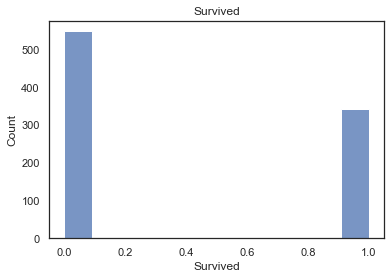

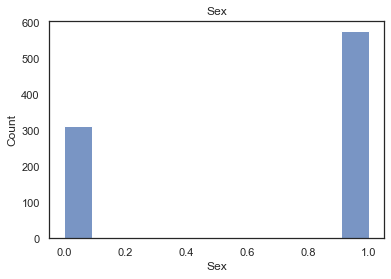

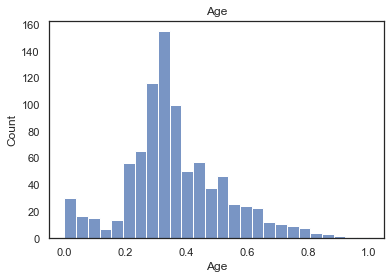

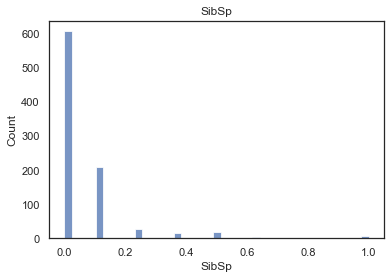

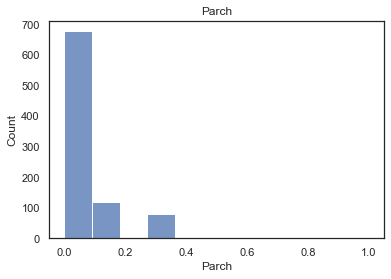

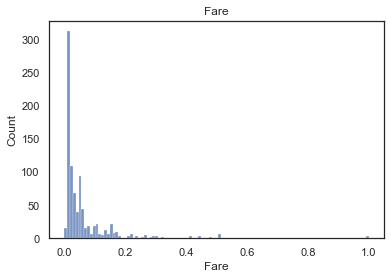

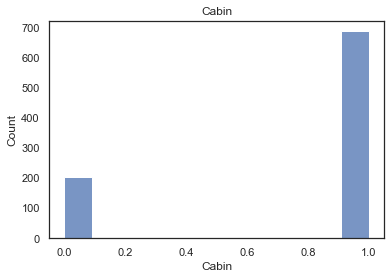

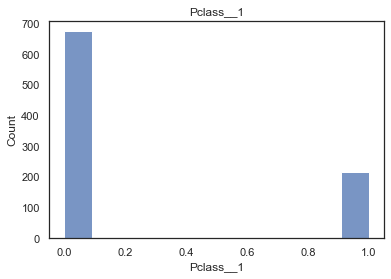

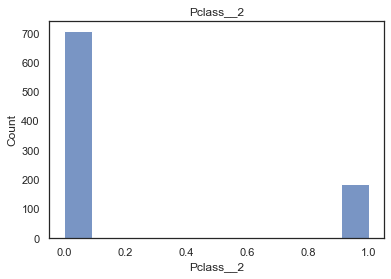

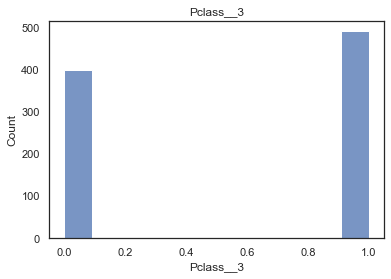

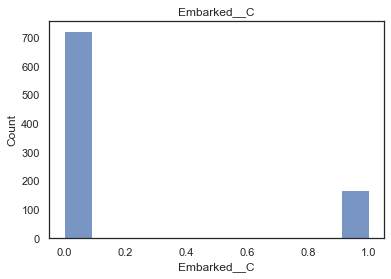

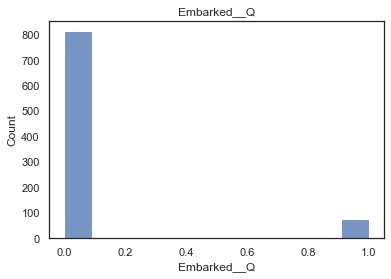

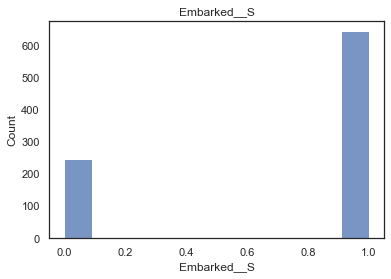

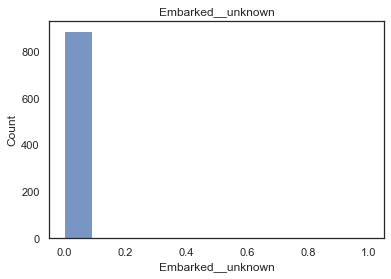

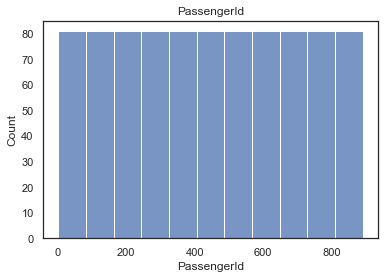

In [150]:
for col in train_data_full.columns.tolist():
    sns.histplot(data=train_data_full[col])
    plt.title(col)
    plt.show()

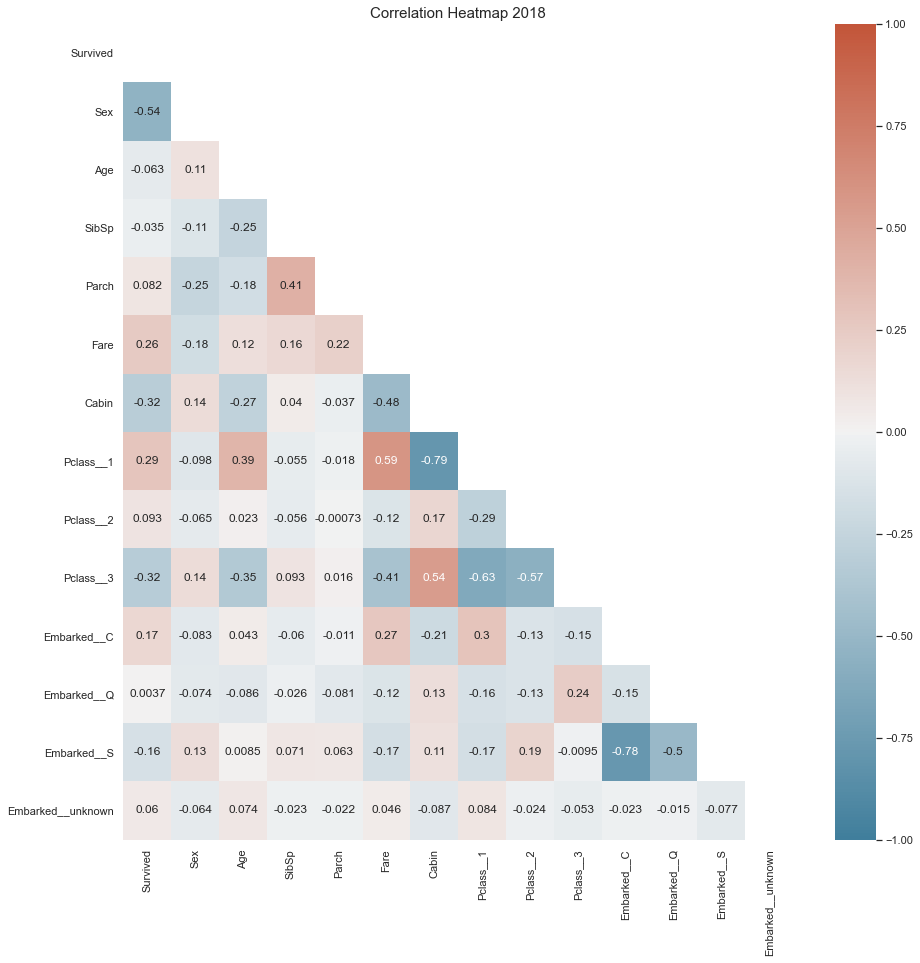

In [286]:
corr = train_data_full.drop(columns=['PassengerId']).corr()
#corr_survived=corr[['Survived']]

#make it only bottom triangle
matrix = np.triu(corr)


fig=plt.figure(figsize=(15,15))

#cute colours
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# plot the heatmap
g=sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
           annot=True, vmax=1, vmin=-1, center=0, mask=matrix, cmap=cmap)


#add title
plt.title("Correlation Heatmap 2018", fontdict = {'fontsize' : 15})


#delete ticks
g.tick_params(axis='y',left=False)
g.tick_params(axis='x',bottom=False)
plt.show()

## Modelling

In [152]:
train_data_full= train_data_full.sample(frac=1)

X = train_data_full.drop('Survived', axis= 1)
y = train_data_full.Survived

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

### Random forest

In [154]:
rand_forest = RandomForestClassifier(n_estimators=100, random_state=42)
rand_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [155]:
Allmetrics(rand_forest, X_train, y_train, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[384   0]
 [  0 239]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[141  24]
 [ 26  77]]
 Classification report 
      precision    recall  f1-score  support
0.0   0.844311  0.854545  0.849398    165.0
1.0   0.762376  0.747573  0.754902    103.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.818536   0.814542  0.799492  0.803896
test   0.813433   0.803344  0.801059  0.802150


,Accuracy,Precision,Recall,f1
Train,0.818536,0.814542,0.799492,0.803896
test,0.813433,0.803344,0.801059,0.802150


### Random forest with oversampling

In [156]:
smote = SMOTE(random_state =7)
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [157]:
print('\nBefore OVER-sampling\n', y_train.value_counts())
print('\nAfter OVER-sampling\n', y_sm.value_counts())


Before OVER-sampling
 0.0    384
1.0    239
Name: Survived, dtype: int64

After OVER-sampling
 0.0    384
1.0    384
Name: Survived, dtype: int64


In [158]:
rand_forest_sm = RandomForestClassifier(n_estimators=100, random_state=42)
rand_forest_sm.fit(X_sm, y_sm)

RandomForestClassifier(random_state=42)

In [159]:
Allmetrics(rand_forest_sm, X_sm, y_sm, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[384   0]
 [  0 384]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[139  26]
 [ 28  75]]
 Classification report 
      precision    recall  f1-score  support
0.0   0.832335  0.842424  0.837349    165.0
1.0   0.742574  0.728155  0.735294    103.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.847830   0.857050  0.848043  0.846593
test   0.798507   0.787455  0.785290  0.786322


,Accuracy,Precision,Recall,f1
Train,0.847830,0.857050,0.848043,0.846593
test,0.798507,0.787455,0.785290,0.786322


### Logistic regression

In [160]:
log_reg = LogisticRegression(random_state=42)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

In [161]:
Allmetrics(log_reg, X_train, y_train, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[336  48]
 [ 74 165]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[142  23]
 [ 27  76]]
 Classification report 
      precision    recall  f1-score  support
0.0   0.840237  0.860606  0.850299    165.0
1.0   0.767677  0.737864  0.752475    103.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.794521   0.786477  0.774212  0.777514
test   0.813433   0.803957  0.799235  0.801387


,Accuracy,Precision,Recall,f1
Train,0.794521,0.786477,0.774212,0.777514
test,0.813433,0.803957,0.799235,0.801387


### Gradient boosting

In [162]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1, 1.2]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))
 

Learning rate:  0.05
Accuracy score (training): 0.735
Accuracy score (validation): 0.701
Learning rate:  0.075
Accuracy score (training): 0.762
Accuracy score (validation): 0.739
Learning rate:  0.1
Accuracy score (training): 0.785
Accuracy score (validation): 0.765
Learning rate:  0.25
Accuracy score (training): 0.820
Accuracy score (validation): 0.799
Learning rate:  0.5
Accuracy score (training): 0.846
Accuracy score (validation): 0.802
Learning rate:  0.75
Accuracy score (training): 0.836
Accuracy score (validation): 0.795
Learning rate:  1
Accuracy score (training): 0.862
Accuracy score (validation): 0.813
Learning rate:  1.2
Accuracy score (training): 0.856
Accuracy score (validation): 0.810


In [163]:
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=1, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, max_depth=2, max_features=2,
                           n_estimators=20, random_state=0)

In [164]:
Allmetrics(gb_clf, X_train, y_train, X_train, y_train)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[358  26]
 [ 60 179]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[358  26]
 [ 60 179]]
 Classification report 
      precision    recall  f1-score  support
0.0   0.856459  0.932292  0.892768    384.0
1.0   0.873171  0.748954  0.806306    239.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.802407   0.798109  0.784053  0.786457
test   0.861958   0.864815  0.840623  0.849537


,Accuracy,Precision,Recall,f1
Train,0.802407,0.798109,0.784053,0.786457
test,0.861958,0.864815,0.840623,0.849537
